# import libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
!pip install lightgbm


     |████████████████████████████████| 1.2 MB 829 kB/s eta 0:00:01


### Loading dataset

In [5]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [6]:
df.shape

(426880, 26)

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [8]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [9]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


### Removing unwanted variables


In [10]:
df = df.drop(['id','url','region','region_url','VIN','image_url','description','county','posting_date','state','model'],axis=1)
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing values


In [11]:
# check missing values are present or not
df.isna().sum()/len(df) * 100

price            0.000000
year             0.282281
manufacturer     4.133714
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
lat              1.534155
long             1.534155
dtype: float64

We can observed that missing values are present in the data. We are going to remove variables which having missingt values more than 70% of data.And also we would drop missing values in the dataset.

In [12]:
df = df.drop(['size'],axis=1)
df.shape

(426880, 14)

In [27]:
df = df.dropna()
df.shape

(116612, 14)

In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
 12  lat           420331 non-null  float64
 13  long          420331 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 224.5 MB


In [14]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,lat,long
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data visualization

<AxesSubplot:title={'center':'Price Distribution'}, xlabel='price', ylabel='Count'>

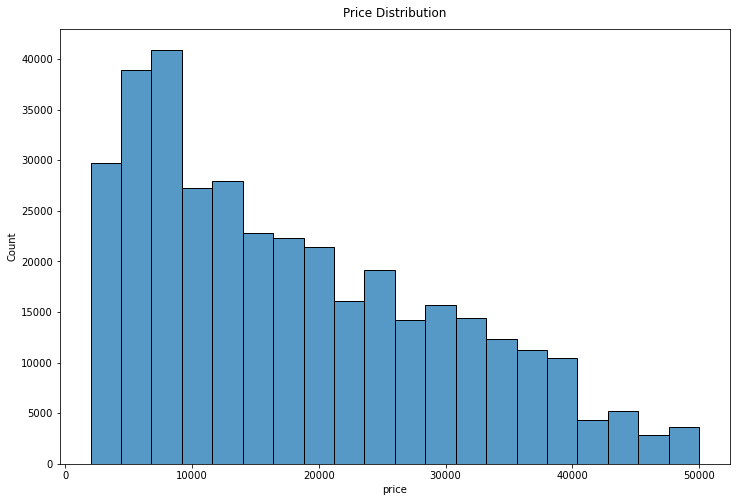

In [15]:
df_prc =df[(df.price >=2000) & (df.price <=50000)]
# Then plot the distriution 
f, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Price Distribution', pad=12)
sns.histplot(df_prc, x="price", stat='count', bins=20)

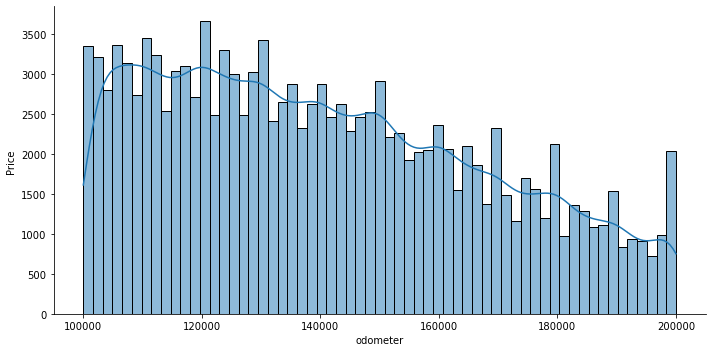

In [16]:
df_prc = df[(df.price >=2000) & (df.price <=50000)]
df_odo = df_prc[(df_prc.odometer >100000) & (df_prc.odometer <=200000)]
sns.displot(data=df_odo, x="odometer", aspect=2, height=5, kde=True)
plt.ylabel("Price ", fontsize=10);

In [28]:
#f, ax = plt.subplots(figsize=(20, 10))
#ax.set_title('Price vs Year', pad=12)
#fig = sns.boxplot(x=df_odo.year.astype(int), y='price', data=df_odo)
#plt.xticks(rotation=90);

1. How price of cars is effected by the fuel

<AxesSubplot:xlabel='fuel', ylabel='count'>

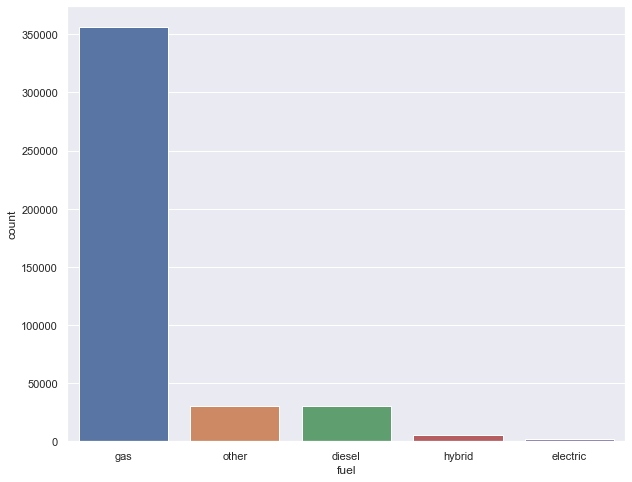

In [19]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='fuel', data=df)

<AxesSubplot:xlabel='fuel', ylabel='price'>

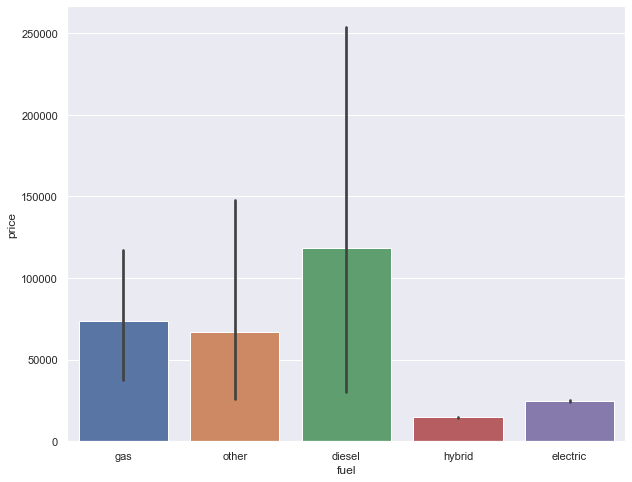

In [20]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x='fuel',y='price',data=df)

From the above plots, we observed that cars which use diesel fuel is costlier than other cars which use like gas, electric,other and hybrid. And also most of the cars are used gas fuel.

2. How price is related to different kinds of manufacturing

In [21]:
df.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

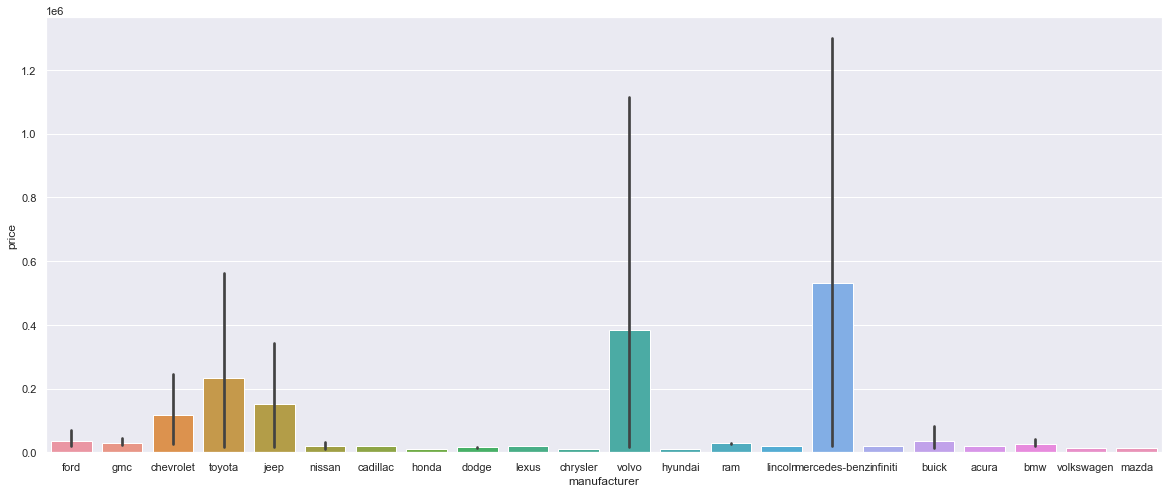

In [22]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='manufacturer',y='price',data=df,order=['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'cadillac',
       'honda', 'dodge', 'lexus', 'chrysler', 'volvo', 'hyundai', 'ram',
       'lincoln', 'mercedes-benz', 'infiniti', 'buick', 'acura', 'bmw',
       'volkswagen', 'mazda'])

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

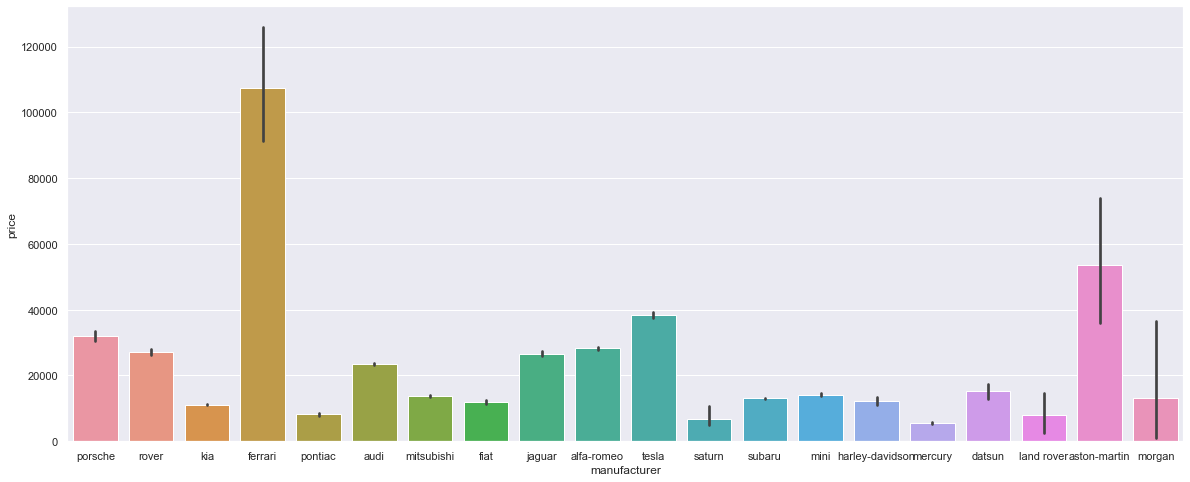

In [23]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x='manufacturer',y='price',data=df,order=['porsche', 'rover', 'kia', 'ferrari',
       'pontiac', 'audi', 'mitsubishi', 'fiat', 'jaguar', 'alfa-romeo',
       'tesla', 'saturn', 'subaru', 'mini', 'harley-davidson', 'mercury',
       'datsun', 'land rover', 'aston-martin', 'morgan'])

From the above above plots, we can conclude that Toyota cars are costlier than other manufactures. 

3. what is the common color for used car

<AxesSubplot:xlabel='paint_color', ylabel='count'>

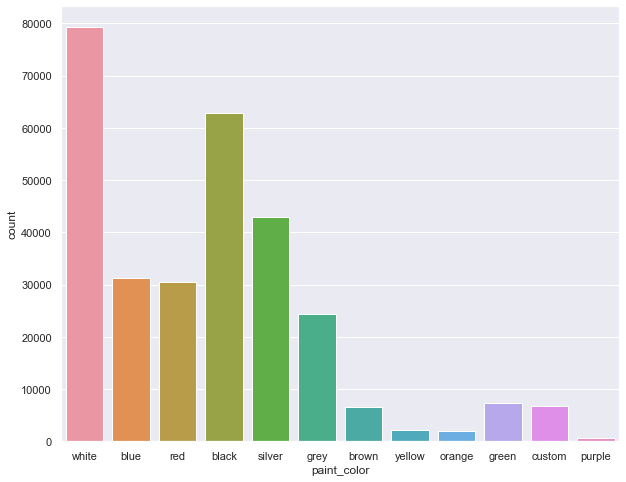

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='paint_color', data=df)

From the above plot, we can conclude that common color for used car is white and followed by black.

4. How can we predict used car price

Encoding the categorical variables

In [29]:
# Get dummy variables
df_encoded = pd.get_dummies(df,columns=['condition','cylinders','manufacturer','fuel','title_status','transmission','drive','type','paint_color'])
# reset index
df_encoded = df_encoded.reset_index(drop=True)
df_encoded.head()

,price,year,odometer,lat,long,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,15000,2013.0,128000.0,32.5920,-85.518900,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27990,2012.0,68696.0,32.5900,-85.480000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34590,2016.0,29499.0,32.5900,-85.480000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35000,2019.0,43000.0,32.6013,-85.443974,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,29990,2016.0,17302.0,32.5900,-85.480000,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Correlation matrix

Plot correlation matrix using heatmap to check how the features are correlated.

In [31]:
# Corrlation between the variables
df_encoded.corr()

,price,year,odometer,lat,long,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
price,1.000000,-0.001394,0.000660,0.003353,-0.006727,0.001920,-0.000402,-0.001324,-0.000662,-0.000218,...,-0.000744,-0.000639,-0.000775,-0.001133,-0.000297,-0.000232,-0.001357,0.006234,0.000039,-0.000351
year,-0.001394,1.000000,-0.121849,-0.017176,0.045622,0.039175,-0.198708,-0.021908,0.089139,0.013423,...,-0.048510,-0.081766,-0.128971,0.035497,-0.053335,-0.034581,-0.057617,0.031916,0.085163,-0.083540
odometer,0.000660,-0.121849,1.000000,0.001574,-0.009015,-0.011939,0.085609,-0.004265,-0.022948,-0.019047,...,0.008460,0.010394,0.014461,0.005645,-0.005079,0.000666,-0.003221,0.006438,-0.007077,-0.007413
lat,0.003353,-0.017176,0.001574,1.000000,-0.036147,-0.003674,0.021939,0.019707,-0.036392,-0.007436,...,0.008947,-0.003614,0.012759,0.020243,0.002467,0.004927,0.018661,-0.000449,-0.053567,-0.004446
long,-0.006727,0.045622,-0.009015,-0.036147,1.000000,-0.053509,-0.012486,0.071354,-0.016820,-0.001037,...,-0.010125,0.007513,-0.001895,-0.016655,0.001270,-0.004000,0.028349,-0.010795,-0.039251,-0.001629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
paint_color_purple,-0.000232,-0.034581,0.000666,0.004927,-0.004000,-0.015196,0.013520,0.008476,0.002007,-0.001719,...,-0.009445,-0.008274,-0.009929,-0.018974,-0.004252,1.000000,-0.019126,-0.022550,-0.030965,-0.005015
paint_color_red,-0.001357,-0.057617,-0.003221,0.018661,0.028349,-0.014228,0.009116,0.015878,-0.008279,0.003393,...,-0.060007,-0.052569,-0.063085,-0.120550,-0.027012,-0.019126,1.000000,-0.143269,-0.196731,-0.031860
paint_color_silver,0.006234,0.031916,0.006438,-0.000449,-0.010795,0.023717,-0.010413,-0.016284,-0.004726,-0.005038,...,-0.070748,-0.061979,-0.074378,-0.142128,-0.031847,-0.022550,-0.143269,1.000000,-0.231946,-0.037563
paint_color_white,0.000039,0.085163,-0.007077,-0.053567,-0.039251,-0.019061,-0.019124,0.020742,0.010198,-0.002041,...,-0.097148,-0.085107,-0.102132,-0.195165,-0.043731,-0.030965,-0.196731,-0.231946,1.000000,-0.051580


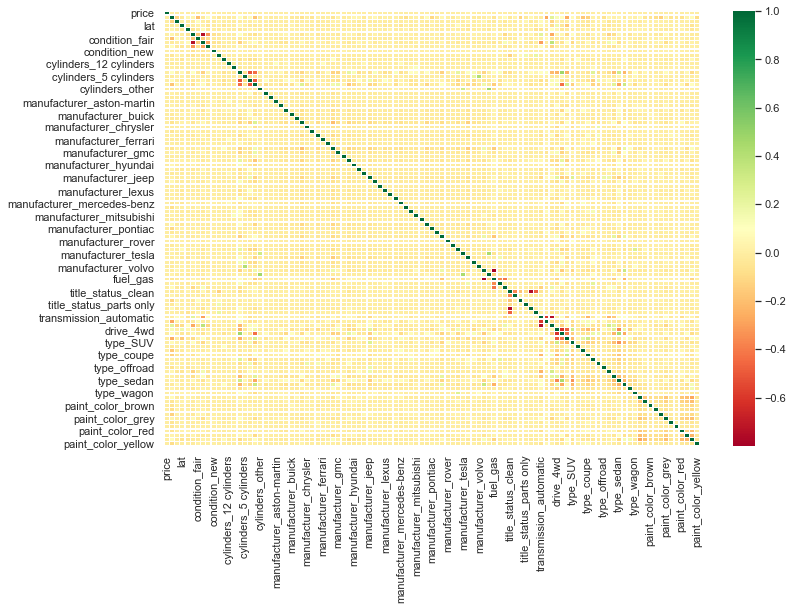

In [32]:
# Correlation plot
plt.figure(figsize = (12,8))
df_corr = df_encoded.corr()
sns.heatmap(df_corr,fmt = "", cmap = "RdYlGn", linewidth = 0.30)
plt.show()

It seems features have less or no correlation between them.

### Split the data

In [34]:
X = df_encoded.drop(['price'] ,axis=1)
Y = df_encoded.price
# Split the data into train and test dataset
# train is 60% and test is 40%
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (69967, 102)
X_test shape is (46645, 102)
y_train shape is (69967,)
y_test shape is (46645,)


In [35]:
X = X_test
Y = y_test
# Split the data into test and train dataset
#valid is 20% and test is 20%
X_test, X_valid, y_test, y_valid = train_test_split(X,Y,test_size=0.4 ,random_state=42)

print(f'X_valid shape is {X_valid.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_valid shape is {y_valid.shape}')
print(f'y_test shape is {y_test.shape}')

X_valid shape is (18658, 102)
X_test shape is (27987, 102)
y_valid shape is (18658,)
y_test shape is (27987,)


In [36]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
X_valid_s=scaler.transform(X_valid)

# Building predictive models

Linear Regression Model

In [37]:
lm = LinearRegression()

## fitting the model
lm.fit(X_train_s,y_train)

LinearRegression()

In [38]:
score = lm.score(X_train_s,y_train)
print(f'Accuracy for linear regression model is {score}')

Accuracy for linear regression model is 0.0006273399054199658


In [39]:
score = lm.score(X_valid_s,y_valid)
print(f'Accuracy for linear regression model is {score}')

Accuracy for linear regression model is 3.0890507908942766e-05


 RMSE for Validtion 

In [63]:
lm_pred = lm.predict(X_valid_s)
lm_pred

array([ 67072.,  19456.,  20224., ..., 231296., 109184., 122368.])

In [66]:
mse = mean_squared_error(y_valid,lm_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for linear regression model is {rmse}')

Root mean squared error for linear regression model is 27356880.939675197


 RMSE for Train

In [86]:
lm_pred = lm.predict(X_train_s)
lm_pred

array([100352.,  -7424.,  32896., ..., -38400., -24064., 201728.])

In [87]:
mse = mean_squared_error(y_train,lm_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for linear regression model is {rmse}')

Root mean squared error for linear regression model is 4282227.277353322


Lasso regularization model

In [41]:
## lasso model
lasso =Lasso(alpha=0.5)

lasso.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [44]:
score = lasso.score(X_train_s,y_train)
print(f'Accuracy train for lasso model is {score}')

Accuracy train for lasso model is 0.0006275703340044014


In [45]:
score = lasso.score(X_valid_s,y_valid)
print(f'Accuracy validation for lasso model is {score}')

Accuracy validation for lasso model is 3.0987138183946605e-05


 RMSE for Validtion 

In [67]:
lasso_pred = lasso.predict(X_valid_s)
lasso_pred

array([ 67324.43038511,  20426.60480973,  21546.6137802 , ...,
       231071.36599033, 110338.10233815, 121680.97389822])

In [68]:
mse = mean_squared_error(y_valid,lasso_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for lasso model is {rmse}')

Root mean squared error for lasso model is 27356879.61788287


 RMSE for train

In [83]:
lasso_pred = lasso.predict(X_train_s)
lasso_pred

array([ 99065.49677266,  -9107.14489135,  33160.5946477 , ...,
       -38304.55915212, -23291.85514608, 201315.09909454])

In [84]:
mse = mean_squared_error(y_train,lasso_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for lasso model is {rmse}')

Root mean squared error for lasso model is 4282226.783669801


Ridge model

In [56]:
## Ridge model
ridge =Ridge(alpha=1.0)

ridge.fit(X_train,y_train)

Ridge()

In [57]:
score = ridge.score(X_train,y_train)
print(f'Accuracy for ridge model is {score}')

Accuracy for ridge model is 0.0006275691547650286


In [58]:
score = ridge.score(X_valid,y_valid)
print(f'Accuracy for ridge model is {score}')

Accuracy for ridge model is 3.097640120919287e-05


 RMSE for Validtion 

In [80]:
ridge_pred = ridge.predict(X_valid_s)
lasso_pred

array([ 67324.43038511,  20426.60480973,  21546.6137802 , ...,
       231071.36599033, 110338.10233815, 121680.97389822])

In [70]:
mse = mean_squared_error(y_valid,ridge_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for Ridge model is {rmse}')

Root mean squared error for Ridge model is 27425986.35918603


 RMSE for train

In [81]:
ridge_pred = ridge.predict(X_train)
lasso_pred

array([ 67324.43038511,  20426.60480973,  21546.6137802 , ...,
       231071.36599033, 110338.10233815, 121680.97389822])

In [82]:
mse = mean_squared_error(y_train,ridge_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for Ridge model is {rmse}')

Root mean squared error for Ridge model is 4282226.786196272


Polynomial model

In [59]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')

Degree 2 polynomial regression train R^2: 0.007


In [62]:
X_valid_poly = poly.transform(X_valid.values)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_valid_poly, y_valid):.3f}')

Degree 2 polynomial regression val R^2: -0.000


In [78]:
#The rmse for the data train
preds_train = lm_poly.predict(X_train_poly)
mse = mean_squared_error(y_train, preds_train, squared=False)
rmse = np.sqrt(mse)
print(f'Root mean squared error for lightgbm model is {rmse}')

Root mean squared error for lightgbm model is 2066.2236738163497


In [79]:
#The rmse for valdtion data
preds_valid = lm_poly.predict(X_valid_poly)
rmse = mean_squared_error(y_valid, preds_valid, squared=False)
rmse = np.sqrt(mse)
print(f'Root mean squared error for lightgbm model is {rmse}')

Root mean squared error for lightgbm model is 2066.2236738163497


Comparing the linear regression, lasso, ridge and polynomial features, linear regression is performing well. So, we are going to use linear regression model to test on test dataset.

In [73]:
X_test = X_test_s
y_test = y_test

score = lm.score(X_test,y_test)
print(f'Accuracy for linear regression model is {score}')

Accuracy for linear regression model is -1.0698369433885486


In [74]:
lm_pred = lm.predict(X_test_s)
lm_pred

array([-12800., 136576., 213376., ..., -57088.,  22272.,  74624.])

In [75]:
mse = mean_squared_error(y_test,lm_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error for Test linear regression model is {rmse}')

Root mean squared error for Test linear regression model is 151568.02411279458


In [94]:
model = ['Linear Regression','Lasso','Ridge','Polynomial']
score = [0.00062, 0.00062, 0.0006275,  0.007]
R_square = [3.089,3.098, 3.097, -0.000]
RSME = [27356.6, 27356879.9, 27425986.3, 2066.2]

results = pd.DataFrame(model,columns=['Model'])
results['Train score'] = score
results['R^2'] = R_square
results['RMSE'] = RSME

results

,Model,Train score,R^2,RMSE
0,Linear Regression,0.000620,3.089,27356.6
1,Lasso,0.000620,3.098,27356879.9
2,Ridge,0.000628,3.097,27425986.3
3,Polynomial,0.007000,-0.000,2066.2
